# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)

for i in range(5):
    scores = np.zeros(num_agents)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to the environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break

    print('total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

total score (averaged over agents) this episode: 0.0549999987706542
total score (averaged over agents) this episode: 0.14049999685958028
total score (averaged over agents) this episode: 0.13099999707192184
total score (averaged over agents) this episode: 0.1699999962002039
total score (averaged over agents) this episode: 0.16449999632313847


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

# KM custom agent training space

In [5]:
from ddpg_agent import Agent   # creates the Actor and Critic networks, and defines OUNoise and ReplayBuffer classes
agent = Agent(num_agents, state_size, action_size, random_seed=0)

In [8]:
# KM DEBUG example only (NOT used in production runs)
env_info  = env.reset(train_mode=True)[brain_name]      # reset the environment    
state     = env_info.vector_observations[0]             # get the current state (for each agent)
# scores = np.zeros(num_agents)                         # initialize the score (for each agent)
scores = []
scores_window = deque(maxlen=100)

print("current state:" + str(state))
# actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
action = agent.act(cur_state, add_noise = False)
action = np.clip(action, -1, 1)                      # all actions between -1 and 1
print("action: " + str(action))
env_info = env.step(action)[brain_name]              # send all actions to the environment
next_state = env_info.vector_observations[0]         # get next state (for each agent)
reward = env_info.rewards[0]                         # get reward (for each agent)
print("reward: " + str(reward))
done = env_info.local_done[0]                        # see if episode finished
print("done: " + str(done))

scores.append(reward)                                # update the score (for each agent))
state = next_state                                   # roll over states to next time step
print(scores)
print('total score this episode: {}'.format(np.mean(scores)))

current state:[  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.11338425e+00  -1.00000000e+00
   7.92214441e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   4.55320328e-01]
action: [ 1.  1.  1.  1.]
reward: 0.0
done: False
[0.0]
total score this episode: 0.0


In [7]:
# main agent training code
import torch
import numpy as np
from collections import deque

episodes = 200
solved   = False

scores = []                         # stores ALL the scores from ALL episodes
scores_window = deque(maxlen=100)   # stores trailing 100 episodes (for assessing if/when environment is solved)

for episode in range(episodes): 
    if not solved:
        score = np.zeros(num_agents)                        # 20 agent 
        # score = 0.0 
    
        # reset the environment
        env_info  = env.reset(train_mode=True)[brain_name]  # resets environment (independent of num_agents)
        agent.reset()                                       # resets noise attribute of agent only
        # cur_state = env_info.vector_observations[0]
        states = env_info.vector_observations               # 20 agent 
    
        while True:
            # predict the best action(s) for the current state
            actions = agent.act(states, add_noise = False)  # 20 agent 
        
            # action(s) is/are performed and new state, reward, info are received (or vectors of each)
            # env_info  = env.step(action)[brain_name]
            env_info  = env.step(actions)[brain_name]       # 20 agent 
        
            # new_state = env_info.vector_observations[0]
            new_states = env_info.vector_observations       # 20 agent 
        
            # reward    = env_info.rewards[0]
            rewards    = env_info.rewards                   # 20 agent 
        
            # done      = env_info.local_done[0]
            dones      = env_info.local_done                # 20 agent 
        
            # current state, action, reward, new state are stored in the experience replay buffer
            # agent.step(cur_state, action, reward, new_state, done)
            agent.step(states, actions, rewards, new_states, dones) # 20 agent 
        
            # roll new state and score to next step in episode
            # cur_state = new_state
            states = new_states                                     # 20 agent 
            # score += reward
            score += rewards                                        # 20 agent 

            if np.any(dones):                                       # 20 agent 
            # if done:
                break
    
        scores.append(score)
        scores_window.append(score)
        
        # print average score over last 10 episodes
        if (episode + 1) % 10 == 0:  
            print('\repisode [{}/{}]\taverage score: {:,.2f}'.format(episode + 1, episodes, np.mean(scores_window)))
        
        # environment considered solved when score >= 30.0 over last 100 episodes
        if np.mean(scores_window) >= 30.0:
            print("\nenvironment solved in {:d} episodes... average score: {:.2f}".format(episode-100, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'km_actor20c.pth')
            torch.save(agent.critic_local.state_dict(), 'km_critic20c.pth')
            solved = True

print('\noverall average score: {:,.2f} \n'.format(np.mean(scores)))

episode [10/200]	average score: 1.20
episode [20/200]	average score: 2.95
episode [30/200]	average score: 5.92
episode [40/200]	average score: 8.88
episode [50/200]	average score: 12.42
episode [60/200]	average score: 15.65
episode [70/200]	average score: 18.03
episode [80/200]	average score: 20.05
episode [90/200]	average score: 21.75
episode [100/200]	average score: 23.24
episode [110/200]	average score: 26.87
episode [120/200]	average score: 30.05

environment solved in 19 episodes... average score: 30.05

overall average score: 25.54 



In [8]:
# validate the trained agent works as observed
env_info = env.reset(train_mode=True)[brain_name]       # reset the environment (same for any agent count)    

# cur_state = env_info.vector_observations[0]
states = env_info.vector_observations                   # 20 agents

for i in range(5):
    # scores_test = 0.0
    scores_test = np.zeros(num_agents)                  # 20 agents

    while True:
        # action = agent.act(cur_state, add_noise = False)
        actions = agent.act(states, add_noise = False)  # 20 agents
        
        # env_info = env.step(action)[brain_name]
        env_info = env.step(actions)[brain_name]        # 20 agents
        
        # next_state = env_info.vector_observations[0]
        next_states = env_info.vector_observations      # 20 agents
        
        # reward = env_info.rewards[0]
        rewards = env_info.rewards                      # 20 agents
        
        # done = env_info.local_done[0]
        dones = env_info.local_done                     # 20 agents
        
        # scores_test += reward
        scores_test += env_info.rewards                 # 20 agents
        
        # cur_state = next_state
        states = next_states                            # 20 agents
        
        if np.any(dones):                               # 20 agents
        # if done:
            break

    print('total score (averaged over agents) this episode: {}'.format(np.mean(scores_test)))

total score (averaged over agents) this episode: 38.75699913371354
total score (averaged over agents) this episode: 37.71049915710464
total score (averaged over agents) this episode: 37.9209991523996
total score (averaged over agents) this episode: 36.546499183122066
total score (averaged over agents) this episode: 38.26749914465472


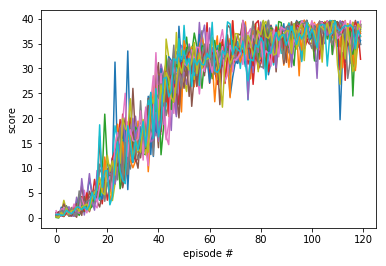

In [9]:
# plot the scores for ALL 20 agents
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('score')
plt.xlabel('episode #')
plt.show()

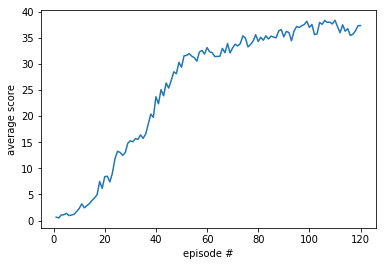

In [10]:
# plot the average score across the agents
score_array = np.asarray(scores)
score_agent_ave = np.mean(score_array, axis = 1)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(1,len(score_agent_ave)+1), score_agent_ave)
plt.xlabel('episode #')
plt.ylabel('average score')
plt.show()

In [7]:
# for all saved pytorch models, load and validate scores of each
import torch
actors = ['km_actor20a.pth', 'km_actor20b.pth', 'km_actor20c.pth']       # list of actor model filenames
critics = ['km_critic20a.pth', 'km_critic20b.pth', 'km_critic20c.pth']   # list of critic model filenames

# load each pair for every pair in files
for actor, critic in zip(actors, critics):
    agent.actor_local.load_state_dict(torch.load(actor, map_location= 'cpu'))
    agent.critic_local.load_state_dict(torch.load(critic, map_location = 'cpu'))
    
    print("\nactor file:  " + str(actor))
    print("critic file: " + str(critic))
    
    # validate the agent works as trained
    env_info = env.reset(train_mode=True)[brain_name]         # reset the environment (same for any agent count)    

    # cur_state = env_info.vector_observations[0]
    states = env_info.vector_observations                   # 20 agents

    for i in range(5):
        # scores_test = 0.0
        scores_test = np.zeros(num_agents)                  # 20 agents

        while True:
            # action = agent.act(cur_state, add_noise = False)
            actions = agent.act(states, add_noise = False)  # 20 agents
        
            # env_info = env.step(action)[brain_name]
            env_info = env.step(actions)[brain_name]        # 20 agents
        
            # next_state = env_info.vector_observations[0]
            next_states = env_info.vector_observations      # 20 agents
        
            # reward = env_info.rewards[0]
            rewards = env_info.rewards                      # 20 agents
        
            # done = env_info.local_done[0]
            dones = env_info.local_done                     # 20 agents
        
            # scores_test += reward
            scores_test += env_info.rewards                 # 20 agents
        
            # cur_state = next_state
            states = next_states                            # 20 agents
        
            if np.any(dones):                               # 20 agents
            # if done:
                break

        print('total score (averaged over agents) this episode: {}'.format(np.mean(scores_test)))


actor file:  km_actor20a.pth
critic file: km_critic20a.pth
total score (averaged over agents) this episode: 32.990499262604864
total score (averaged over agents) this episode: 32.35449927682057
total score (averaged over agents) this episode: 32.11249928222969
total score (averaged over agents) this episode: 32.84799926578999
total score (averaged over agents) this episode: 30.93399930857122

actor file:  km_actor20b.pth
critic file: km_critic20b.pth
total score (averaged over agents) this episode: 34.08599923811853
total score (averaged over agents) this episode: 33.85099924337119
total score (averaged over agents) this episode: 33.65749924769625
total score (averaged over agents) this episode: 33.61099924873561
total score (averaged over agents) this episode: 34.79799922220409

actor file:  km_actor20c.pth
critic file: km_critic20c.pth
total score (averaged over agents) this episode: 37.977499151136726
total score (averaged over agents) this episode: 37.505999161675575
total score (